In [44]:
%matplotlib inline
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from analyser import *

from scipy.stats.mstats import kendalltau, spearmanr
import random


In [45]:

from itertools import combinations

# Dummy dataset

In [46]:
usrcnt = 5
pblcnt = 5

order = range(pblcnt)

users = ["U%d"%i for i in range(usrcnt)]
pbls =  ["P%d"%i for i in range(pblcnt)]

In [47]:
df = pd.DataFrame(index=pbls)

for u in users:
    random.shuffle(order)
    df[u] = order

In [48]:
df

,U0,U1,U2,U3,U4
P0,0,1,2,0,3
P1,2,0,0,1,2
P2,1,2,3,3,4
P3,4,3,1,2,0
P4,3,4,4,4,1


# Possible users combinaisons

In [49]:
comb = [c for c in combinations(users, r=2)]
#print comb

# Compute Kendall rank for each combinaison

In [50]:
KR = [kendalltau(df[u1], df[u2]) for u1, u2 in comb]

### Kendall rank correlation

In [51]:
#  Kendall rank correlation
KRC = [a for a, b in [kendalltau(df[u1], df[u2]) for u1, u2 in comb]]

In [52]:
res = pd.DataFrame(index=comb)
res["KRC"] = KRC
res

,KRC
"(U0, U1)",0.4
"(U0, U2)",0.0
"(U0, U3)",0.4
"(U0, U4)",-0.8
"(U1, U2)",0.6
"(U1, U3)",0.6
"(U1, U4)",-0.2
"(U2, U3)",0.6
"(U2, U4)",0.2
"(U3, U4)",-0.2


### Kendall rank distance

In [53]:
l = [i for i in combinations(pbls, 2)]

comp = [df.T[a] > df.T[b] for a,b in l]
test = pd.DataFrame(comp)
dist = test.join(pd.Series(l, name="Pairs"))
dist

,U0,U1,U2,U3,U4,Pairs
0,False,True,True,False,True,"(P0, P1)"
1,False,False,False,False,False,"(P0, P2)"
2,False,False,True,False,True,"(P0, P3)"
3,False,False,False,False,True,"(P0, P4)"
4,True,False,False,False,False,"(P1, P2)"
5,False,False,False,False,True,"(P1, P3)"
6,False,False,False,False,True,"(P1, P4)"
7,False,False,True,True,True,"(P2, P3)"
8,False,False,False,False,True,"(P2, P4)"
9,True,False,False,False,False,"(P3, P4)"


In [54]:
KRD = []
for u1, u2 in comb:
    s = dist[u1] != dist[u2]
    a = s.sum()
    n = len(pbls)
    KRD.append(float(a) / (n*(n-1) / 2))

In [55]:
res["KRD"] = KRD
res

,KRC,KRD
"(U0, U1)",0.4,0.3
"(U0, U2)",0.0,0.5
"(U0, U3)",0.4,0.3
"(U0, U4)",-0.8,0.9
"(U1, U2)",0.6,0.2
"(U1, U3)",0.6,0.2
"(U1, U4)",-0.2,0.6
"(U2, U3)",0.6,0.2
"(U2, U4)",0.2,0.4
"(U3, U4)",-0.2,0.6


### Spearman rank-order correlation

In [56]:
[a for a in spearmanr(df["U1"], df["U2"])]

[0.69999999999999996, masked_array(data = 0.188120404374,
              mask = False,
        fill_value = 1e+20)]

In [57]:
SROC = [a for a, b in [spearmanr(df[u1], df[u2]) for u1, u2 in comb]]

In [58]:
res["SROC"] = SROC
res

,KRC,KRD,SROC
"(U0, U1)",0.4,0.3,0.6
"(U0, U2)",0.0,0.5,-0.1
"(U0, U3)",0.4,0.3,0.5
"(U0, U4)",-0.8,0.9,-0.9
"(U1, U2)",0.6,0.2,0.7
"(U1, U3)",0.6,0.2,0.8
"(U1, U4)",-0.2,0.6,-0.5
"(U2, U3)",0.6,0.2,0.7
"(U2, U4)",0.2,0.4,0.2
"(U3, U4)",-0.2,0.6,-0.2


In [59]:
df

,U0,U1,U2,U3,U4
P0,0,1,2,0,3
P1,2,0,0,1,2
P2,1,2,3,3,4
P3,4,3,1,2,0
P4,3,4,4,4,1


In [38]:
normalize(res.KRC)
normalize(res.KRD)
normalize(res.SROC)

In [60]:
res

,KRC,KRD,SROC
"(U0, U1)",0.4,0.3,0.6
"(U0, U2)",0.0,0.5,-0.1
"(U0, U3)",0.4,0.3,0.5
"(U0, U4)",-0.8,0.9,-0.9
"(U1, U2)",0.6,0.2,0.7
"(U1, U3)",0.6,0.2,0.8
"(U1, U4)",-0.2,0.6,-0.5
"(U2, U3)",0.6,0.2,0.7
"(U2, U4)",0.2,0.4,0.2
"(U3, U4)",-0.2,0.6,-0.2


<IPython.core.display.Javascript object>


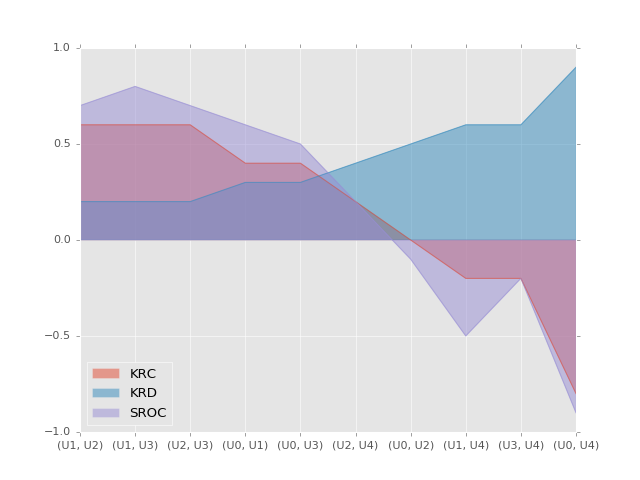

In [61]:
res.sort_values(by="KRD").plot(kind="area", stacked=False)

<IPython.core.display.Javascript object>


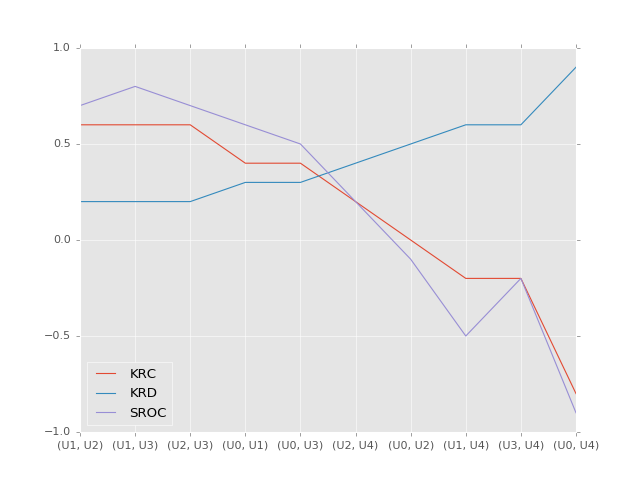

In [62]:
res.sort_values(by="KRD").plot()

<IPython.core.display.Javascript object>


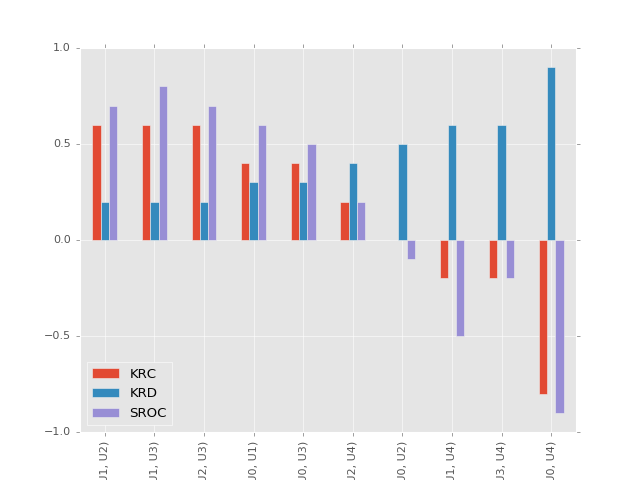

In [63]:
res.sort_values(by="KRD").plot(kind='bar')

In [64]:
df

,U0,U1,U2,U3,U4
P0,0,1,2,0,3
P1,2,0,0,1,2
P2,1,2,3,3,4
P3,4,3,1,2,0
P4,3,4,4,4,1
